In [ ]:
'''IMPORTING DEPENDENCIES'''

import pandas as pd
import numpy as np


USING THE NEATTEXT FOR TEXT CLEANING

In [ ]:
!pip install neattext
# Load Text Cleaning Pkgs
import neattext.functions as nfx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df=pd.read_csv("/content/emotion-labels-train.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613 entries, 0 to 3612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3613 non-null   object
 1   label   3613 non-null   object
dtypes: object(2)
memory usage: 56.6+ KB


In [ ]:
df.head()

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


DESCRIPTIVE DATA ANALYSIS

In [ ]:
df.describe()

,text,label
count,3613,3613
unique,3565,4
top,i love the word fret so much and im in heaven,fear
freq,2,1147


UNIQUE VALUES IN EMOTION COLUMN

In [ ]:
df['label'].value_counts()

fear       1147
anger       857
joy         823
sadness     786
Name: label, dtype: int64

HANDLING IMBALANCED DATA

In [ ]:
x = df.drop(df[df['label'] == 'fear'].index)

In [ ]:
fear_df = df[df['label'] == 'fear'].sample(n=800, random_state=42)

In [ ]:
df = pd.concat([x, fear_df])

##**EXPLORATORY DATA ANALYSIS**

<Axes: >

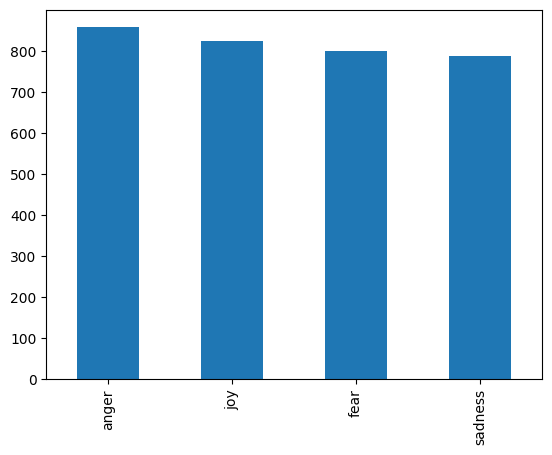

In [ ]:
df['label'].value_counts().plot(kind='bar')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

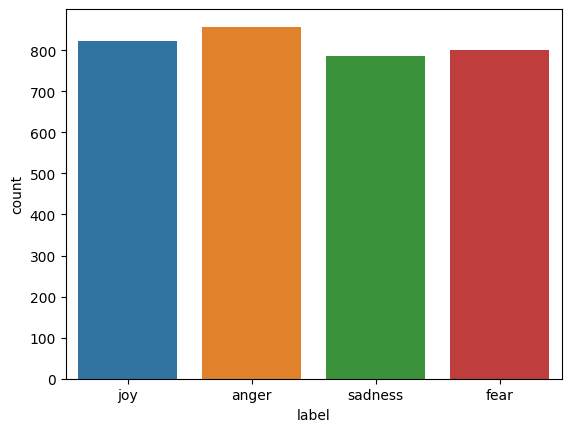

In [ ]:
sns.countplot(x='label',data=df)

In [ ]:
dir(nfx)

##**DATA CLEANING/PREPROCESSING**

In [ ]:
df['Clean_Text'] = df['text'].apply(nfx.remove_userhandles)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [ ]:
x = df['Clean_Text']
y = df['label']

##**DATA MODELING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression

CREATING A PIPELINE OF COUNT VECTORIZER AND LOGISTIC REGRESSION 

In [ ]:
from sklearn.pipeline import Pipeline
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [ ]:
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_lr.score(x_test,y_test)

0.8547400611620795

DATA PREPROCESSING

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

train_texts =x_train
train_labels = y_train
test_texts = x_test

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [ps.stem(word) for word in tokens]
    return " ".join(tokens)

train_texts = [preprocess(text) for text in train_texts]
test_texts = [preprocess(text) for text in test_texts]

vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train_texts)
test_features = vectorizer.transform(test_texts)

model = LogisticRegression(max_iter=1000)
model.fit(train_features, train_labels)

predicted_labels = model.predict(test_features)
print(predicted_labels)

In [ ]:
print(predicted_labels)

In [ ]:

print(y_test)

1852       fear
1976      anger
2248      anger
480         joy
3443    sadness
         ...   
1917       fear
2101      anger
2578      anger
2412      anger
733         joy
Name: label, Length: 654, dtype: object


RESULTS

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predicted_labels))

0.8379204892966361


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
pipe_lr1 = Pipeline(steps=[('cv',CountVectorizer()),('lr',MultinomialNB())])
pipe_lr1.fit(x_train,y_train)
pipe_lr1.score(x_test,y_test)

0.8165137614678899

SAVING THE MODEL

In [ ]:
import joblib
pipeline_file = open("Emotion_Detection.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [ ]:
!pip install autokeras

In [ ]:
import pandas as pd

In [ ]:
trainSet = pd.read_csv('emotion-labels-train.csv')
valSet = pd.read_csv('emotion-labels-val.csv')
testSet = pd.read_csv('emotion-labels-test.csv')
trainSet.head()

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


In [ ]:
# Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix
import autokeras as ak

In [ ]:
train = pd.concat([trainSet, valSet], axis=0).reset_index(drop=True)

# Split data
X_train, X_val, y_train, y_val = train_test_split(train['text'], train['label'],
                                                    stratify=train['label'],
                                                    test_size=0.2, random_state=123)

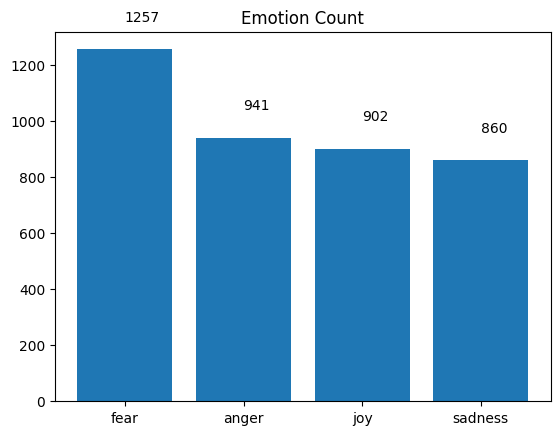

In [ ]:
plt.bar(train['label'].value_counts().index, list(train['label'].value_counts()))
for index, value in enumerate(list(train['label'].value_counts())):
    plt.text(index, value+100, str(value))
plt.title('Emotion Count')
plt.show()

In [ ]:
# Preparing the data for autokeras
X_train_ak = np.array(X_train)
y_train_ak = np.array(y_train)
X_val_ak = np.array(X_val)
y_val_ak = np.array(y_val)

In [ ]:
# Create the model
node_input = ak.TextInput()
node_output = ak.TextToIntSequence()(node_input)
node_output = ak.Embedding()(node_output)
node_output = ak.ConvBlock(separable=True)(node_output)
node_output = ak.ClassificationHead()(node_output)
keras = ak.AutoModel(inputs=node_input, outputs=node_output, overwrite=True, max_trials=3)

# Fit the training dataset
keras.fit(X_train_ak, y_train_ak, epochs=80, validation_split=0.2)

Trial 3 Complete [00h 06m 12s]
val_loss: 1.3746140003204346

Best val_loss So Far: 1.0663808584213257
Total elapsed time: 00h 15m 01s
Epoch 1/80
99/99 [==============================] - 16s 150ms/step - loss: 1.3780 - accuracy: 0.3138
Epoch 2/80
99/99 [==============================] - 15s 151ms/step - loss: 1.3762 - accuracy: 0.3172
Epoch 3/80
99/99 [==============================] - 15s 152ms/step - loss: 1.3761 - accuracy: 0.3172
Epoch 4/80
99/99 [==============================] - 15s 152ms/step - loss: 1.3760 - accuracy: 0.3172
Epoch 5/80
99/99 [==============================] - 16s 161ms/step - loss: 1.3760 - accuracy: 0.3172
Epoch 6/80
99/99 [==============================] - 15s 152ms/step - loss: 1.3759 - accuracy: 0.3172
Epoch 7/80
99/99 [==============================] - 15s 151ms/step - loss: 1.3759 - accuracy: 0.3172
Epoch 8/80
99/99 [==============================] - 16s 159ms/step - loss: 1.3759 - accuracy: 0.3172
Epoch 9/80
99/99 [==============================] - 15s 15

In [ ]:
keras_export = keras.export_model()
keras_export.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None,)]                 0         
                                                                 
 expand_last_dim (ExpandLast  (None, 1)                0         
 Dim)                                                            
                                                                 
 text_vectorization (TextVec  (None, 512)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 512, 128)          2560128   
                                                                 
 dropout (Dropout)           (None, 512, 128)          0         
                                                                 
 separable_conv1d (Separable  (None, 510, 128)         16896 

In [ ]:
# Predict the validation data
pred_keras = keras.predict(X_val_ak)

# Compute the accuracy
print('Accuracy: ' + str(accuracy_score(y_val_ak, pred_keras)))

25/25 [==============================] - 1s 25ms/step
Accuracy: 0.61489898989899


In [ ]:
# Convert predicted result into pandas series with numeric type
pred_keras_ = pd.DataFrame(pred_keras)
pred_keras_ = pred_keras_[0]

# Compute the accuracy
print('Accuracy: ' + str(accuracy_score(y_val, pred_keras_)))
print('')

# Prediction results
print('Confusion Matrix')
print(pd.DataFrame(confusion_matrix(y_val, pred_keras_), index=['anger','fear','joy','sad'], columns=['anger','fear','joy','sad']))
print('')
print('Classification Report')
print(classification_report(y_val, pred_keras_))

Accuracy: 0.61489898989899

Confusion Matrix
       anger  fear  joy  sad
anger    109     4   19   56
fear      13   153    3   83
joy       16     5  129   30
sad       49    15   12   96

Classification Report
              precision    recall  f1-score   support

       anger       0.58      0.58      0.58       188
        fear       0.86      0.61      0.71       252
         joy       0.79      0.72      0.75       180
     sadness       0.36      0.56      0.44       172

    accuracy                           0.61       792
   macro avg       0.65      0.62      0.62       792
weighted avg       0.67      0.61      0.63       792

